<font size = 8 color ='336EFF'>kNN</font>

Import Relevant Libraries

In [2]:
# your code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scipy as sp
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_openml

C:\Users\IKER\AppData\Local\Temp\ipykernel_28464\1127872303.py:6: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


Import mnist dataset

In [3]:

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

c:\Users\IKER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Separate in data(X) and target(y)

In [4]:
# your code

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

x = mnist['data'] 
y = mnist['target']  
y=y.astype(int)

c:\Users\IKER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Plot the image one random number (remember to reshape)

# aleatorio: 54236


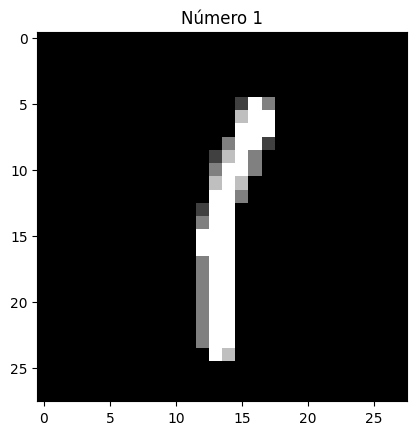

In [5]:

# Número entero aleatorio entre 0 y la longitud de x
random_index = np.random.randint(0, len(x)) 
print("# aleatorio:",random_index)

# Selecciona una fila del conjunto de datos , obtiene sus valores y los reshapea en una matriz de 28x28
random_image = x.iloc[random_index].values.reshape(28, 28)  

# selecciona un número de y que representa el número que se va a graficar
label = y.iloc[random_index]

# Visualiza la imagen con imshow
plt.figure()
plt.imshow(random_image, cmap='gray')
plt.title(f'Número {label}')
plt.show()




Split data in train(first 60000) and test(the rest)

In [6]:

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=42)


Train a kNN classifier

Set parameters weights='distance' and n_neighbors=4

In [7]:


# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=4,weights="distance")







Predict the test dataset and print the confusion matrix

In [8]:
# Train the classifier on the training set
knn_classifier.fit(xtrain, ytrain)

# Make predictions on the testing set
y_pred = knn_classifier.predict(xtest)

# Print the confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1030    0    2    0    0    0    1    1    1    0]
 [   0 1200    1    0    1    0    0    2    0    1]
 [   4   10  988    1    1    0    2    9    3    1]
 [   0    1   10 1044    1    8    1    6    4    6]
 [   2    6    1    0  935    0    2    3    1   18]
 [   0    4    0   10    2  943    9    0    1    1]
 [   4    0    0    0    4    4  996    0    1    0]
 [   0   14    3    0    3    0    0 1083    0    7]
 [   1    9    2   15    1   14    4    8  952   10]
 [   4    3    0    7   12    0    0   14    1 1046]]


Plot the confusion matrix

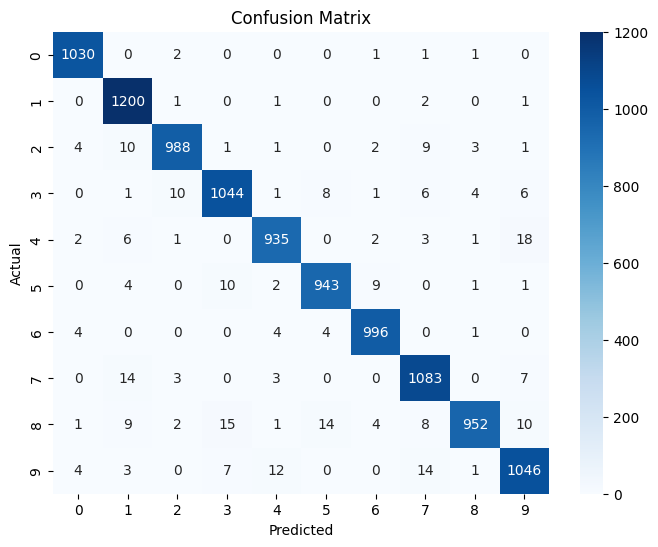

In [21]:

# Print the confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)


# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Matriz de Confusión Original')
plt.show()


Print the the accuracy score, precision score, recall score, f1 score(for the last three use parameter average=None)

In [24]:

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(ytest, y_pred)
recall = recall_score(ytest, y_pred, average=None)
f1 = f1_score(ytest, y_pred, average=None)
precision = precision_score(ytest, y_pred, average=None)




print(f"Accuracy: {accuracy}")
print("Precision Score:")
print(precision)

print("Recall Score:")
print(recall)


print("f1 score:")
print(f1)


Accuracy: 0.973047619047619
Precision Score:
[0.98564593 0.96230954 0.98113208 0.96935933 0.97395833 0.97316821
 0.98128079 0.96181172 0.98755187 0.95963303]
Recall Score:
[0.99516908 0.99585062 0.96957802 0.96577243 0.96590909 0.97216495
 0.98711596 0.97567568 0.93700787 0.96228151]
f1 score:
[0.99038462 0.97879282 0.97532083 0.96756256 0.96991701 0.97266632
 0.98418972 0.9686941  0.96161616 0.96095544]


Import shift from scipy.ndimage.interpolation to do data aumentation in for directions dx and dy = ((1, 0), (-1, 0), (0, 1), (0, -1)) 

In [25]:

# Función que recibe el dataframe y las direcciones de movimiento
def desplazar(img, dx, dy):
    img = img.reshape((28, 28))
    img_desplazada = shift(img, [dx, dy])
    return img_desplazada.reshape([-1])

# Aumento de datos

imgs_aumentadas = [img for img in xtrain.values]
objs_aumentados = [obj for obj in ytrain.values.T]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for img, obj in zip(xtrain.values, ytrain.values.T):
        imgs_aumentadas.append(desplazar(img, dx, dy))
        objs_aumentados.append(obj)


Train a new classifier with the augmented data

In [26]:

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(imgs_aumentadas, objs_aumentados, test_size=0.15, random_state=42)


# Create a KNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=4,weights="distance")



# Train the classifier on the training set
knn_classifier.fit(xtrain, ytrain)



KNeighborsClassifier(n_neighbors=4, weights='distance')

Predict with test dataset

In [27]:

# Make predictions on the testing set
y_pred = knn_classifier.predict(xtest)



Calculate the accuracy score, print confusion matrix and plot confusion matrix

Confusion Matrix:
[[4448    4    1    0    0    3    5    2    0    3]
 [   0 4997    4    0    0    0    2    3    0    2]
 [  14   13 4337    6    1    3    2   29    2    4]
 [   2    2    6 4493    0   20    1   10    5    6]
 [   1   18    0    1 4410    0    2    4    0   43]
 [   2    0    0   17    2 3938   24    3    0    8]
 [   8   10    0    0    1    8 4429    0    0    0]
 [   0   30    5    0    4    0    0 4541    0   16]
 [   4   31    3   33    7   31   14   10 4155   21]
 [   8    4    0   17   28    8    0   27    3 4266]]


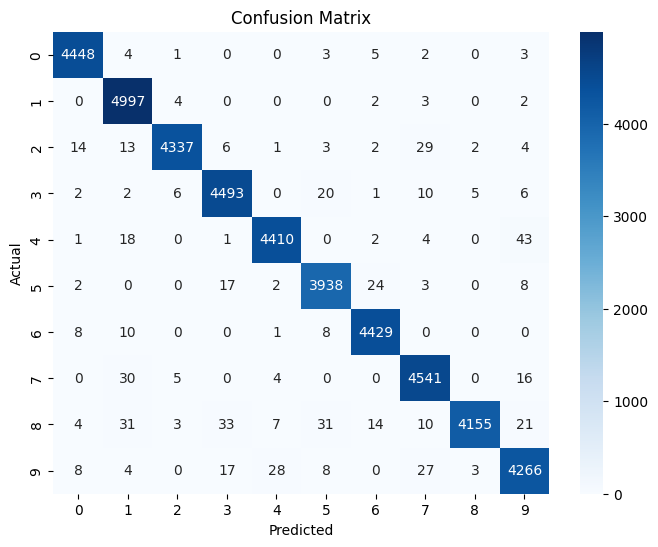

Accuracy: 0.9863081232492997


In [28]:

# Print the confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



# Print the confusion matrix
conf_matrix = confusion_matrix(ytest, y_pred)


# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="Blues")
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Matriz de Confusión para Datos Aumentados')
plt.show()

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(ytest, y_pred)

print(f"Accuracy: {accuracy}")

